# Shedding Light on Market Efficiency with ML and Python

![](./images/title_pic_medium.png)

****By Scott Morgan****

Over the span of my +10 year career, I've had the privilege of collaborating with a number of accomplished investment professionals. These experts consistently demonstrated their skill in discerning and trading the relative value across a company’s capital structure. While their insights and convictions have always been evident, I personally sought a quantifiable perspective on the intricate dynamics among various asset classes.

Utilizing modern machine learning methodologies, I aim to provide a fresh, albeit informal, perspective on the potential flow of information between different asset classes. At best, I hope to quantifiably answer questions like: **“Can a portfolio manager use the fluctuations in company XYZ’s high yield bond or leveraged loan prices as a leading indicator for XYZ’s equity?”**. At the very least, I hope to spark new avenues of thought or research that others can pursue and develop further.

While this exploration primarily stems from my long-standing intellectual curiosity and the desire to enrich my personal project portfolio, it is worth noting that this article is not intended as a formal commentary on the Efficient Market Hypothesis (EMH). Instead, it is more simply a creative foray into understanding inter-asset relationships more deeply through machine learning.

In this analysis, I examine the landscape of securities at the market or asset class level. I have selected eight well-recognized indexes (detailed in the Appendix) that represent broad markets as proxies. Integrating the principles of the Efficient Market Hypothesis (EMH), the rationale is simple: it is essential to validate and understand the various market relationships and dynamics at a high level. Once a clear picture of these overarching interactions is established, within the context of EMH, we can confidently discuss crafting investment strategies to potentially capture relative value from individual companies and their specific securities. Such detailed analysis may be the focus of a subsequent study, should I choose to pursue it.

In the upcoming section,s Ifirst discuss the EMH and its significance for active portfolio management. After this, I proceed to an exploratory data analysis (EDA) that assesses return distributions, drawdowns, and correlations of major asset classes. Following the EDA, I analyze market efficiency in its three distinct forms: weak, semi-strong, and strong. Using advanced statistical models and machine learning techniques in Python, I aim to identify potential informational inefficiencies. This is followed by a section on the underlying assumptions and limitations of my methods, suggesting further research avenues, and culminating with insights on practical implementations and the promise of emerging technologies.


## DISSECTING MARKET EFFICIENCY AND ITS IMPLICATIONS FOR ACTIVE PORTFOLIO MANAGEMENT
---
The Efficient Market Hypothesis (EMH) has long been at the forefront of financial discourse. Burton Malkiel’s notable contribution, positing the stock market as a ‘random walk,’ implies that future stock prices are independent of their past, presenting a formidable challenge to anyone seeking an edge in predicting market movements (Malkiel, 2007). This concept is further delineated into three levels of market efficiency:

- **Weak Form**: Proposes past price and volume data can't forecast future prices.

- **Semi-Strong Form**: Suggests all publicly accessible information is factored into asset prices.

- **Strong Form**: Contends that every piece of information, public or private, is already reflected in asset prices.


This theoretical framework has significant implications for active portfolio managers. Newer entrants, like algorithmic traders and robo-advisors, have ramped up competition, diminishing the traditional informational edge of human managers. The swift action of these technologically equipped participants makes the window to exploit market inefficiencies exceedingly small. Additionally, the mounting popularity of passive, cost-efficient mechanisms, like index funds and ETFs, has put active managers’ fees and performance under intense scrutiny.

Starting in the latter half of the 20th century, particularly from the 1970s onwards, the once predominantly stock and bond-focused capital market began to diversify. Today, the financial landscape encompasses developing, emerging, and frontier market asset classes in various sizes, styles, and instruments, creating a diverse yet complex universe of potential investments. For active managers, this evolution brings fresh opportunities but also introduces novel challenges and risks.

Next, we begin our exploratory data analysis (EDA) by examining return distributions, drawdowns, and correlations for a number of major asset classes. Understanding these areas will offer insights into potential risks, rewards, and the interplay among different investment avenues.


***Let's import our functions and start the analysis! Please feel free to reference this Jupyter notebook via my github: https://github.com/ScottMorgan85/ml-market-efficiency

In [2]:
from utils.helpers import *
from utils.data_import_and_processing import *
from utils.visualization import *

import importlib
import utils.market_efficiency_tests
importlib.reload(utils.market_efficiency_tests)
from utils.market_efficiency_tests import *

index_prices, index_returns = fetch_and_save_data(tickers, start_date, end_date, index_prices_path, index_returns_path)
lagged_targets = generate_lagged_returns_and_targets(index_returns)
combined_data = generate_and_combine(index_prices,lagged_targets)

Data loaded from existing CSV files.
Data import process completed.
Feature engineering completed.


## EXPLORATORY DATA ANALYSIS (EDA)
---
### The Landscape of Asset Class Returns

We start our EDA by collecting asset class returns spanning approximately 20 years of daily data. Ideally, we'd like financial market return data to mimic a normal distribution: predominantly smaller gains, fewer small losses, and minimal large swings or volatility - though is rarely the case in reality. 

Certain characteristics hint at possible inefficiencies. Two terms that are important to define are skewness and kurtosis:

#### Definition(s) & Context

##### Skewness
![](./images/skewness.png)
- **Reference Range:** Typically lies between -3 and +3.
  - Positive values ***(Positive Skew)*** signal a tail on the right side of the distribution, indicating the possibility of periodic significant gains. This could be interpreted as markets occasionally underestimating positive outliers or windfall events.
  - Values closer to 0 suggest symmetry in the return distribution ***(Symmetrical Distribution)***, indicating a balanced occurrence of positive and negative returns.
  - Negative values ***(Negative Skew)*** suggest a tail on the left side of the distribution, indicating the potential for occasional large losses. This could hint at inefficiencies in pricing specific downside risks.


  
##### Kurtosis
![](./images/kurtosis.png)
- **Reference Range:** A value around 3 indicates a normal distribution. ***(Mesokurtic)***
  - Values significantly greater than 3 suggest a distribution with tails heavier than a normal distribution, indicating more extreme returns. ***(Leptokurtic)*** 
  - Values less than 3 imply a distribution with lighter tails, signifying fewer extreme returns. ***(Platykurtic)***
  
With this backdrop in mind:

- **US Bank Loans:** The kurtosis value of 93.23 is notably high, hinting at extremely atypical return fluctuations for this asset class. It’s important to note that this figure is influenced mainly by 14 outlier days from March 2020 (COVID) and late 2008/early 2009 (Credit Crisis), two occasions when the asset class experienced unprecedented mutual fund redemptions amid heightened uncertainty (Cetorelli & Santos, 2020). Without these outlier data points the kurtosis and skewness of US Bank Loans would be 33.1 and -3.1 during the period, respectively. This is not surprisingly more in-line with the US HighYield Bond asset class. The pronounced negative skewness indicates the potential for large, rare downturns, signaling possible inefficiencies. I do not remove these outliers when building predictive models in the coming sections to preserve the integrity of the dataset and accurately capture the real-world dynamics of the US Bank Loan market.

- **US High Yield Bonds and Emerging Market Debt:** These classes display significant kurtosis values, suggesting they experience more extreme return variations. Their negative skews indicate potential downside risks, implying inefficiencies in these markets.

- **US Large Cap Equities, US Small Cap Equities, and Emerging Market Equities:** These assets exhibit mild skewness and kurtosis values, aligning more closely with the characteristics of a typical distribution.

In the following section, the analysis is taken a step further with discussion of **drawdown** by asset class. 


                            Skewness   Kurtosis
US Large Cap Equities      -0.361336  11.111269
US Small Cap Equities      -0.420484   6.690497
US Investment Grade Bonds  -0.707514   6.989607
US High Yield Bonds        -1.567971  25.884649
US Bank Loans              -4.337148  92.514116
Developed Country Equities -0.094855  12.244390
Emerging Market Equities   -0.114532  11.086358
Emerging Market Debt       -1.988816  27.250750


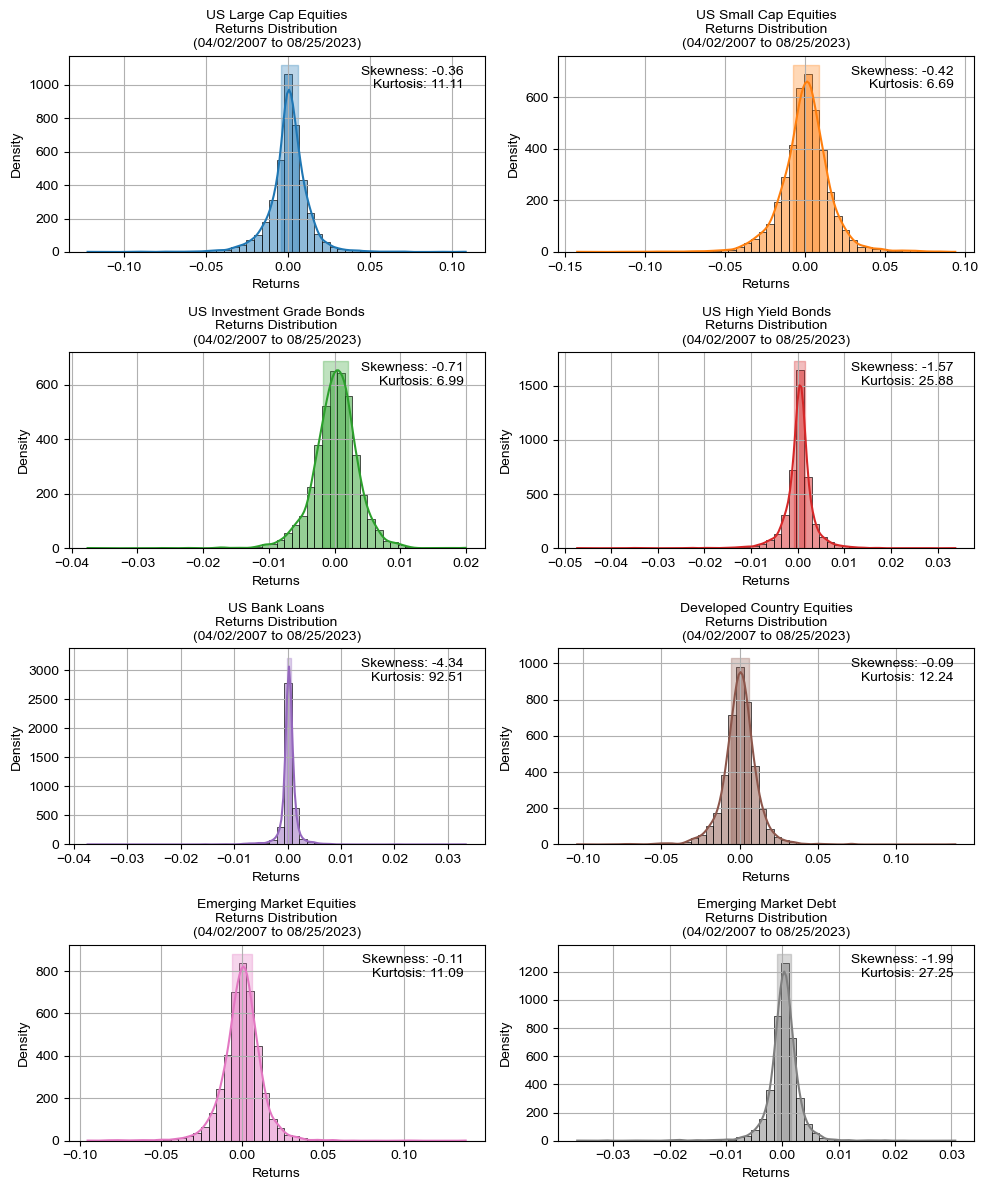

In [3]:
# Now, calculate skewness and kurtosis
skew_kurt_df = calculate_skewness_kurtosis(index_returns)

# Proceed to plot the distribution
plot_distribution(index_returns, skew_kurt_df, start_date, end_date)

### Unraveling Drawdown Dynamics: A Mirror to Market Efficiency?

Understanding drawdown is pivotal in dissecting the behavior of asset classes. At its core, a drawdown represents the decline from a peak to a trough in the value of an investment, signaling the potential downside risk an investor could face.

#### Definition(s) & Context
- **Drawdown:**  The decline from a peak to a trough in the value of an investment, signaling the potential downside risk an investor could face. Reflects the **risk of loss** an asset might present.
- **Market Efficiency:** A lower drawdown typically suggests **stability**, but it can also hint at inefficiencies when juxtaposed against other metrics.

Given this backdrop (see below drawdown chart):

- **US High Yield Bonds and US Bank Loans:** Despite showing signs of potential inefficiency in their return distributions, they have some of the smallest drawdowns. This contrast poses questions:
  - Is their market or instrument structure inherently stable, allowing such drawdown dynamics?
  - Do these apparent inefficiencies, paradoxically, stabilize these markets or are there other factors at play?

From an investment strategy standpoint:

- Assets with smaller drawdowns, even if showing potential inefficiencies, become attractive. They signal the possibility to exploit mispricings while also ensuring a more stable performance trajectory.

The subsequent section will discuss correlations among the asset classes and what they means in terms of market efficiency.

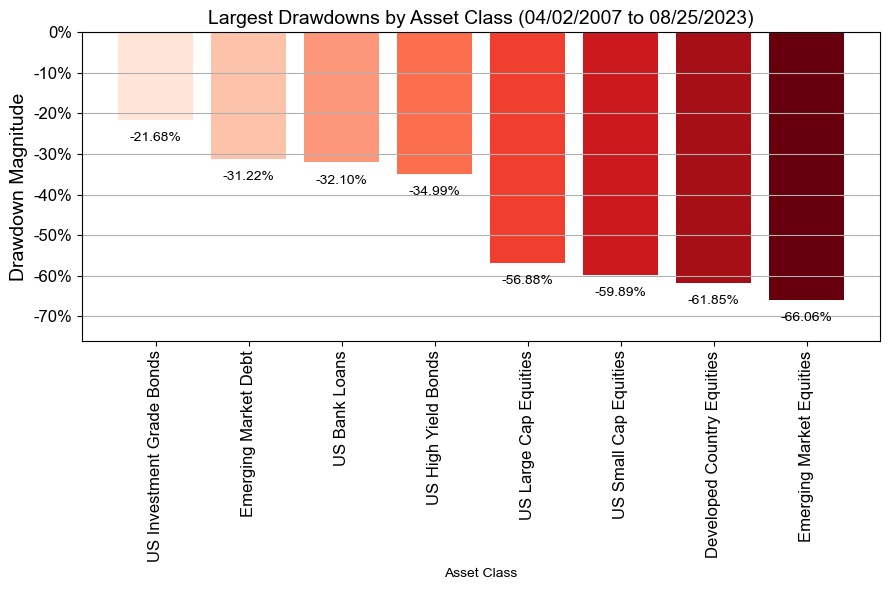

In [4]:
plot_drawdowns(index_returns, start_date, end_date)

### Correlation Analysis: A Lens to Market Efficiency

At the core of understanding market dynamics is the concept of correlation. It measures how asset class returns move in relation to each other over time.

#### Definition(s) & Context
- **Correlation:** Indicates the strength and direction of the linear relationship between two asset classes. A value closer to 1 means they move together; closer to -1 means they move in opposite directions.
- **Diversification:** Identifying assets that don't move in lockstep can help in constructing portfolios that balance risk.
- **Market Efficiency:** Highly correlated assets might be responding to similar market information, while assets with low or negative correlations could be influenced by different factors.

Given this backdrop (see below correlation matrix):

- <span style="color:green">**US Large Cap Equities and US Small Cap Equities:** A high correlation of 0.917 underscores their synchronized movement, suggesting they are likely influenced by similar market dynamics.</span>
  
- **US Investment Grade Bonds:** Displaying a mild negative correlation with both Large and Small Cap Equities, these bonds offer diversification benefits thanks to the differing driving factors versus equity markets.

- <span style="color:green">**US High Yield Bonds and US Bank Loans:** Their strong positive relationship of 0.73 suggests a similar risk and return profile, echoing shared market influences.</span>

- <span style="color:green">**Emerging Market Equities and Developed Country Equities:** A correlation coefficient of 0.782 indicates they often move in harmony, which is likely due to shared global factors impacting them.</span>

These correlation patterns not only inform asset allocation decisions but also pave the way for deeper dives into market efficiency. Understanding these interconnections can unveil potential anomalies in the ways markets process and reflect information.


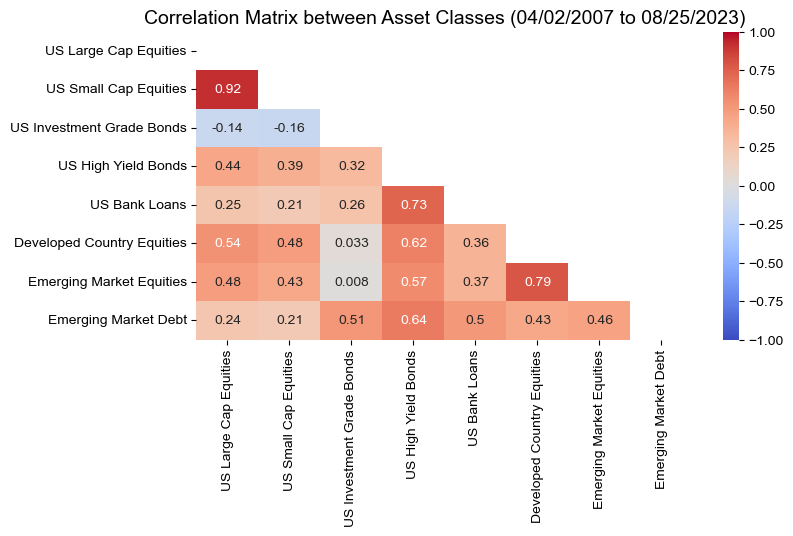

In [5]:
plot_correlation(index_returns, start_date, end_date)

## ANALYTICAL DEEP DIVE: EFFICIENCY VARIATIONS ACROSS ASSET CLASSES
---

### Part 1: Weak Form Efficiency and Autocorrelation Insights
<hr style="border-top: 2px dotted #444;">

#### Background and Motivation
Autocorrelation measures the **relationship of an asset's current returns with its past returns**. Significant autocorrelation indicates past returns might predict future returns. This challenges the **weak form of the Efficient Market Hypothesis (EMH)**, which posits asset prices incorporate all historical data.

####  Methodology
Autocorrelation, or serial correlation, quantifies how a time series, like stock returns, correlates with a lagged version of itself. By checking how today's returns relate to yesterday's (or those of days prior), we can gauge if past price movements offer any predictive power. Graphically, when points in the Autocorrelation Function (ACF) plot exceed the blue shaded regions, it signals significant autocorrelation - see charts below. This becomes instrumental in detecting patterns like momentum or mean reversion in financial data.

#### Weak Form Results

- **US Large and Small Cap Equities:** Show initial negative autocorrelation, hinting at mean reversion tendencies.
  
- **US Investment Grade Bonds:** Display potential momentum with initial positive autocorrelation.

- <span style="color:green">**US High Yield Bonds, US Bank Loans**: Strong positive autocorrelation across multiple lags suggests potential inefficiencies or return predictability.</span>
  
- **Developed Country and Emerging Market Equities:** Present a mixed dynamic, hinting at potential inefficiencies.

- <span style="color:green">**Emerging Market Debt:** Displays momentum, especially in initial lags, similar to High Yield Bonds.</span>

#### Weak Form Conclusion

***US High Yield Bonds, US Bank Loans, and Emerging Market Debt***, during the evaluated period, suggest past returns might be indicative of future returns, hinting at potential inefficiencies. This is particularly interesting when considering that these are predominantly corporate debt markets. One hypothesis for this observed pattern could be the structural similarities within corporate debt markets. These markets, often characterized relative to equity markets as having less liquidity, more large institutional participants and higher sensitivity to economic news and credit events, might exhibit more pronounced autocorrelations. This could be a manifestation of information dissemination being somewhat slower in these markets due to institutional constraints or the specific nature of debt instruments. Other asset classes align more with the weak form of EMH.

While the weak form of EMH focuses on historical price and volume data, the **semi-strong form** goes a step further. It posits that asset prices incorporate **all publicly available information**. In the next section, we'll explore predictive modeling techniques to test this layer of market efficiency.

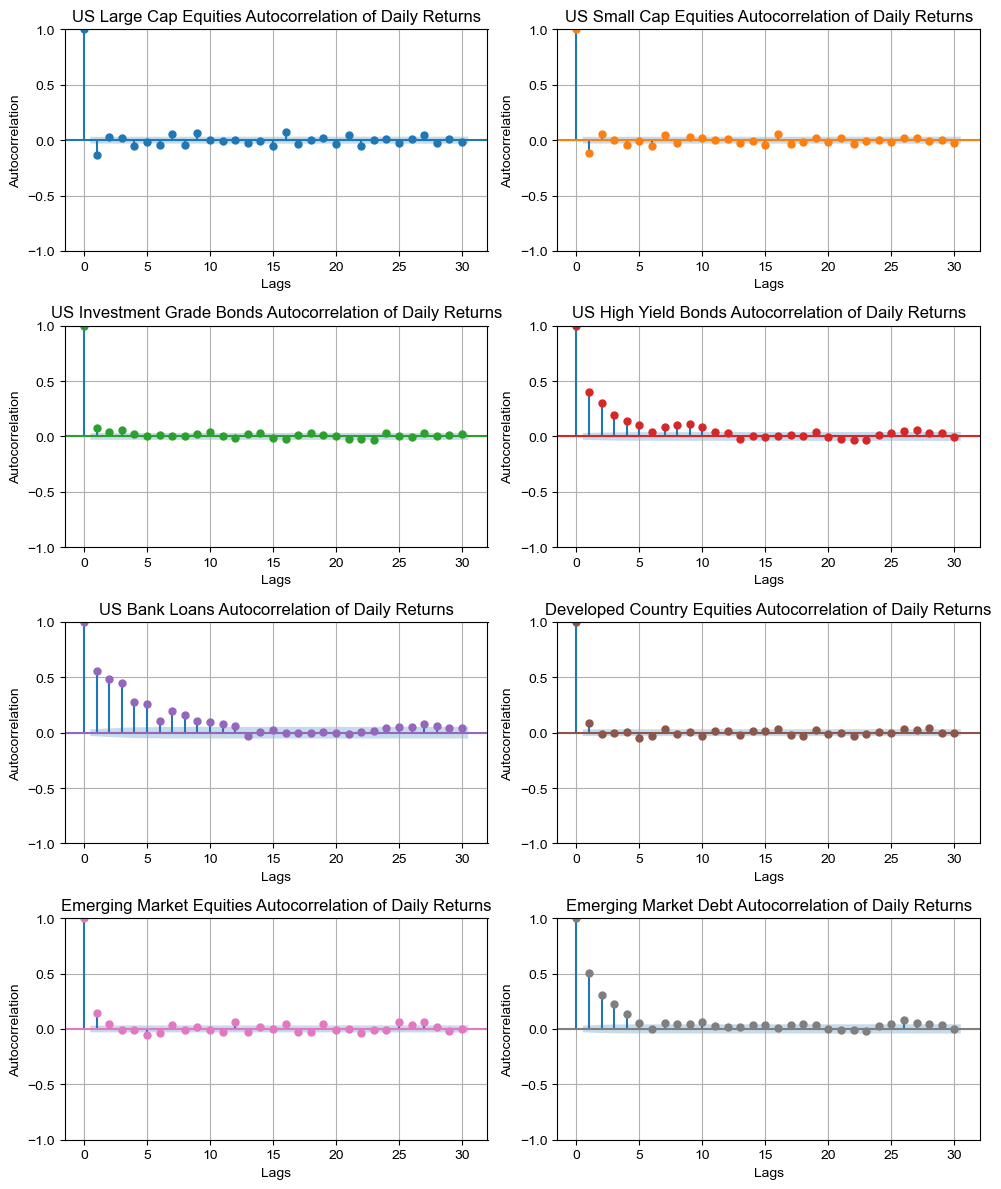

In [6]:
plot_autocorrelation(index_returns, readable_names)

### Part 2: Probing Semi-Strong Efficiency Through Predictive Modeling
<hr style="border-top: 2px dotted #444;">

#### Background and Motivation
Financial markets are complex systems where countless factors interplay. The **semi-strong form** of the EMH posits that asset prices adjust rapidly to **all publicly available** information. If an asset's price does not fully incorporate this information, opportunities might arise for traders to exploit and potentially earn above-average returns.

**Why Predictive Models?**
- Machine learning models can probe the market's response to public information by trying to predict future prices or returns based on historical data.
- If a model can consistently predict future returns from past information with a high "accuracy" (>50%), it suggests that the asset class doesn't incorporate event-related data rapidly, challenging the semi-strong form of EMH.

#### Methodology
**Model**: XGBoost classifier was employed, prized for its adaptability and lucidity in representation.

**Features**: Incorporated historical technical indicators such as SMA (Simple Moving Average), EMA (Exponential Moving Average), RSI (Relative Strength Index), and MACD (Moving Average Convergence Divergence).

**Target Variable**: The target varible is the next day's binary return by asset class (1 if the next day return is >0%, otherwise 0), reducing the prediction to a directional trend rather than exact magnitude, to mitigate the influence of noisy data.

**Evaluation Metric - F1 Score:**
- Both false positives (erroneously predicting a price rise) and false negatives (missing out on a genuine price rise) can be costly in financial markets.
- The F1 Score balances precision (accuracy of positive predictions) and recall (proportion of actual positives identified correctly).
- Evaluating F1 across different intervals — **5, 30, 60, and 90 days** — shows how long post-event our models maintain accuracy, enabling insights into how quickly markets incorporate new public information.
- ***The asset class with the highest average F1 score on the test data will be deemed the top performing model.***

**Test and Train Periods:** 
- **Train Period (Non-Event Days):** Timeframes where no significant public events occurred, allowing models to learn the typical patterns of asset class returns.

- **Test Period (Event Days):** Periods following significant public announcements or events. It is the critical window where I test if the patterns learned during non-event days can predict returns after new public information.

Below are the major events and their respective start dates in a table and interactive visual:

| Event                    | Event Date  |
|--------------------------|-------------|
| Lehman Collapse          | 2008-09-15  |
| ECB QE Announcement      | 2015-01-22  |
| Brexit Vote              | 2016-06-23  |
| COVID-19 Pandemic        | 2020-03-11  |
| Russia-Ukraine/Fed Hikes | 2022-02-25  |
| SVB Collapse             | 2023-03-10  |


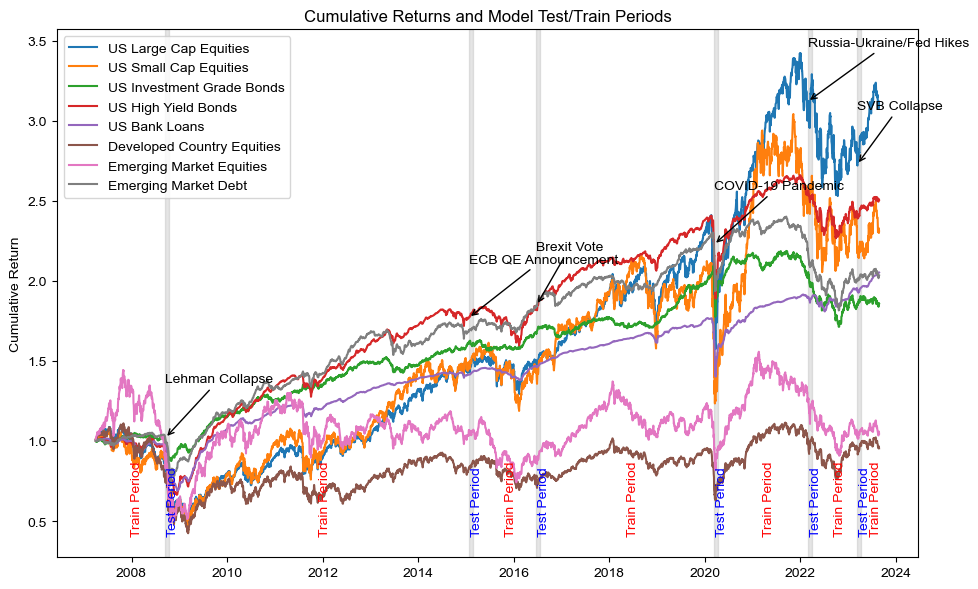

In [7]:
plot_cumulative_returns_with_events(index_returns)

In [ ]:
#run XGBoost Models
final_table, xgb_styled_evaluation_df = xgb_display_styled_evaluation(combined_data,highlight_f1)
xgb_styled_evaluation_df

#### Semi-Strong Results

The F1 scores for the various asset classes at different time intervals after events and the average F1 scores are as follows:

<table>
  <tr>
    <th>F1 Metrics for XGBoost Across Different Time Intervals</th>
    <th>5 days</th>
    <th>30 days</th>
    <th>60 days</th>
    <th>90 days</th>
    <th>Average F1</th>
  </tr>
  <tr>
    <td>US Large Cap Equities</td>
    <td>0.60</td>
    <td>0.54</td>
    <td>0.53</td>
    <td>0.55</td>
    <td>0.56</td>
  </tr>
  <tr>
    <td>US Small Cap Equities</td>
    <td>0.48</td>
    <td>0.56</td>
    <td>0.55</td>
    <td>0.56</td>
    <td>0.54</td>
  </tr>
  <tr>
    <td>US Investment Grade Bonds</td>
    <td>0.50</td>
    <td>0.61</td>
    <td>0.57</td>
    <td>0.56</td>
    <td>0.56</td>
  </tr>
  <tr style="background-color:yellow">
    <td>US High Yield Bonds</td>
    <td>0.50</td>
    <td>0.64</td>
    <td>0.61</td>
    <td>0.57</td>
    <td>0.58</td>
  </tr>
  <tr style="background-color:yellow">
    <td>US Bank Loans</td>
    <td>0.52</td>
    <td>0.74</td>
    <td>0.77</td>
    <td>0.76</td>
    <td>0.70</td>
  </tr>
  <tr>
    <td>Developed Country Equities</td>
    <td>0.35</td>
    <td>0.59</td>
    <td>0.55</td>
    <td>0.57</td>
    <td>0.52</td>
  </tr>
  <tr>
    <td>Emerging Market Equities</td>
    <td>0.56</td>
    <td>0.48</td>
    <td>0.53</td>
    <td>0.60</td>
    <td>0.54</td>
  </tr>
  <tr>
    <td>Emerging Market Debt</td>
    <td>0.58</td>
    <td>0.52</td>
    <td>0.53</td>
    <td>0.60</td>
    <td>0.56</td>
  </tr>
</table>


> <span style="color:green">**Key Observation**: US Bank Loans emerge as the best performer, on average.</span>

***Result Highlights***
- **US Large Cap Equities:** F1 scores suggest a trend towards randomness, but with some fluctuations.
  
- **US Small Cap Equities:** More pronounced volatility in shorter time frames, stabilizing over longer durations.

- **US Investment Grade Bonds:** Moderate efficiency over the periods.
  
- <span style="color:green"> **US High Yield Bonds & US Bank Loans:** Scores considerably above 0.5 hint at inefficiencies. This suggests room for investors to potentially capitalize on certain patterns or information.</span>
  
- **Developed Country Equities, Emerging Market Equities, and Emerging Market Debt:** Scores around 0.5 to 0.6 range, indicating some randomness with hints of patterns, especially in longer time frames.


#### Semi-Strong Conclusion
While certain asset classes like US Large Cap Equities and US Small Cap Equities seem to align more closely with the semi-strong form of the EMH, others, particularly **US High Yield Bonds** and **US Bank Loans**, indicate potential market inefficiencies. Interestingly, given that these are corporate debt markets, there might be structural similarities or characteristics that account for the observed patterns.

It's essential to note that these findings are based on the results from a single algorithm (XGBoost) without hyperparameter tuning. The insights might become more robust with a comprehensive exploration involving algorithm tuning and experimenting with various algorithms beyond XGBoost. Our analysis is not exhaustive, and additional modeling approaches could reveal further nuances in market efficiency.

As we near the end of this analysis, I utilize transfer learning to assess the strong form efficiency, exploring if patterns recognized in one asset class can be translated and exploited in others. The top performing model in this test was the ***US Bank Loans*** and will serve as the base model for transfer learning. 

### Part 3: Strong Form Efficiency and Transfer Learning Insights
<hr style="border-top: 2px dotted #444;">


#### Background and Motivation
While the weak and semi-strong forms of EMH deal with historical price data and all publicly available information, respectively, the **strong form** posits that prices instantly reflect *all* information: **public and private**. However, if a pattern learned in one asset class (like US Bank Loans) can predict returns in another asset class, it might suggest that not all information is incorporated instantly — hence, challenging the strong form of EMH.


**Strong Form Markets Instantly Reflect All Information**

<img src="./images/strong_visual.png" width="60%">

#### Methodology
**Transfer Learning**:
- Transfer Learning leverages patterns or knowledge learned from one task and applies it to a different, yet related, task.
- Transfer learning powers advancements in NLP (e.g., BERT), medical imaging diagnostics, and enhances predictions in sectors like retail, manufacturing, and inventory management, showcasing its versatility.
- In our context, the model trained on **US Bank Loans** will be applied to other asset classes. The rationale: if the patterns recognized in US Bank Loans (source domain) can be used to predict the returns of another asset class (target domain), it might indicate shared underlying inefficiencies or structures across the markets.

**Why Keras and Not XGBoost?**:
- Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
- Leveraging TensorFlow as the backend for Keras in this analysis, I employed a multi-layered perceptron, a type of feedforward artificial neural network. 
- Given its flexibility, I re-ran the models using Keras, which offers more sophisticated architectures, especially suitable for transfer learning. **US Bank Loans** still emerged as the top-performing asset class, aligning with the XGBoost findings:

<table>
  <tr>
    <th>F1 Metrics for Keras Across Different Time Intervals</th>
    <th>5 days</th>
    <th>30 days</th>
    <th>60 days</th>
    <th>90 days</th>
    <th>Average F1</th>
  </tr>
  <tr>
    <td>US Large Cap Equities</td>
    <td>0.61</td>
    <td>0.68</td>
    <td>0.66</td>
    <td>0.69</td>
    <td>0.66</td>
  </tr>
  <tr>
    <td>US Small Cap Equities</td>
    <td>0.65</td>
    <td>0.55</td>
    <td>0.62</td>
    <td>0.68</td>
    <td>0.63</td>
  </tr>
  <tr>
    <td>US Investment Grade Bonds</td>
    <td>0.68</td>
    <td>0.61</td>
    <td>0.60</td>
    <td>0.68</td>
    <td>0.65</td>
  </tr>
  <tr>
    <td>US High Yield Bonds</td>
    <td>0.64</td>
    <td>0.77</td>
    <td>0.72</td>
    <td>0.70</td>
    <td>0.71</td>
  </tr>
  <tr style="background-color:yellow">
    <td>US Bank Loans</td>
    <td>0.67</td>
    <td>0.82</td>
    <td>0.80</td>
    <td>0.78</td>
    <td>0.76</td>
  </tr>
  <tr>
    <td>Developed Country Equities</td>
    <td>0.55</td>
    <td>0.70</td>
    <td>0.55</td>
    <td>0.52</td>
    <td>0.58</td>
  </tr>
  <tr>
    <td>Emerging Market Equities</td>
    <td>0.50</td>
    <td>0.56</td>
    <td>0.65</td>
    <td>0.66</td>
    <td>0.59</td>
  </tr>
  <tr>
    <td>Emerging Market Debt</td>
    <td>0.53</td>
    <td>0.63</td>
    <td>0.65</td>
    <td>0.68</td>
    <td>0.62</td>
  </tr>
</table>

**Evaluation Metric - F1 Score:**

If F1 scores improved on average when using transfer learning (a model trained on one dataset and applied to another) versus the models trained on their individual datasets, it may indicate a few things:

 - **Shared Information Across Asset Classes**: This could suggest that there are universal features or patterns shared across different asset classes. In essence, information in one market may contain patterns relevant to another, lending some criticism to the strong form EMH, especially if this shared information isn't public.

 - **Potential Inefficiencies**: An improvement in F1 scores might also hint at certain inefficiencies in the market that can be better captured when incorporating information from other asset classes. This could be seen as a deviation from the strong form criteria, as it implies that not all available information is perfectly and instantaneously priced into an asset.

 - **Versatility of Machine Learning**: From a more technical standpoint, the result could also emphasize the versatility of machine learning models, specifically their ability to recognize patterns across datasets (asset classes) and generalize findings effectively.

 - **Model Robustness**: If transfer learning improves accuracy, it could mean that the model benefits from a broader base of data, making it more robust. Training on its own dataset might not expose the model to the variety of data patterns that it encounters when being applied to another dataset.

In [ ]:
#run keras Models
final_table, keras_styled_evaluation_df = keras_display_styled_evaluation(combined_data,highlight_f1)

#run transfer learning scoring 
transfer_final_table,transfer_styled_evaluation_df = transfer_display_styled_evaluation(combined_data, highlight_f1)

#### Strong Form Results
Using the Keras model trained on **US Bank Loans**, I scored the other asset classes' test data. Below are the results:


<table>
  <tr>
    <th>Transfer Learning F1 Metrics for Keras Across Different Time Intervals</th>
    <th>5 days</th>
    <th>30 days</th>
    <th>60 days</th>
    <th>90 days</th>
    <th>Average F1</th>
  </tr>
  <tr>
    <td>US Large Cap Equities</td>
    <td>0.25</td>
    <td>0.67</td>
    <td>0.63</td>
    <td>0.60</td>
    <td>0.54</td>
  </tr>
  <tr>
    <td>US Small Cap Equities</td>
    <td>0.33</td>
    <td>0.65</td>
    <td>0.66</td>
    <td>0.62</td>
    <td>0.57</td>
  </tr>
  <tr style="background-color:yellow">
    <td>US Investment Grade Bonds</td>
    <td>0.79</td>
    <td>0.65</td>
    <td>0.67</td>
    <td>0.62</td>
    <td>0.68</td>
  </tr>
  <tr>
    <td>US High Yield Bonds</td>
    <td>0.62</td>
    <td>0.76</td>
    <td>0.69</td>
    <td>0.65</td>
    <td>0.68</td>
  </tr>
  <tr>
    <td>Developed Country Equities</td>
    <td>0.50</td>
    <td>0.69</td>
    <td>0.68</td>
    <td>0.66</td>
    <td>0.63</td>
  </tr>
  <tr style="background-color:yellow">
    <td>Emerging Market Equities</td>
    <td>0.58</td>
    <td>0.61</td>
    <td>0.64</td>
    <td>0.65</td>
    <td>0.62</td>
  </tr>
  <tr>
    <td>Emerging Market Debt</td>
    <td>0.67</td>
    <td>0.63</td>
    <td>0.65</td>
    <td>0.64</td>
    <td>0.65</td>
  </tr>
</table>

> <span style="color:green">**Key Observation**: Both US Investment Grade Bonds and Emerging Market Equities showed improved performance from transfer learning.</span>

**Result Highlights**

- **US Large Cap Equities**: There is a noticeable decrease in the 5-day score (from 0.61 to 0.25) after transfer learning. However, scores for the other time intervals remain relatively close. Transfer learning from the bank loans model might not be beneficial for this asset class, especially in shorter time frames.

- **US Small Cap Equities**: Results after transfer learning have slightly decreased in some time intervals, but the overall range is similar. The utility of transfer learning for this class remains ambiguous.

- <span style="color:green">**US Investment Grade Bonds**: Transfer learning resulted in a significant boost for the 5-day interval (from 0.68 to 0.79), indicating that insights from the bank loans model could be beneficial for short-term predictions. </span>

- **US High Yield Bonds**: The scores have slightly decreased after transfer learning, suggesting that the bank loans model might not generalize well to this asset class. This is a surprising finding given their relatively similar return/risk profiles and seniority in the capital structure.

- **Developed Country Equities**: There's a noticeable improvement in the 5-day interval score (from 0.55 to 0.50). This could hint that transfer learning offers valuable insights for shorter durations in this category.

- <span style="color:green">**Emerging Market Equities**: The scores are relatively stable post-transfer, suggesting potential benefits from the bank loans model, especially for longer durations.</span>

- **Emerging Market Debt**: The scores have marginally improved in the 5-day interval but are relatively consistent across other intervals. This suggests a neutral impact from transfer learning for this asset class.

#### Strong Form Conclusion

Transfer learning using the **US Bank Loans model** has shown promising results, especially when applied to:
- **US Investment Grade Bonds**
- **Emerging Market Equities**

***The significant improvements in these asset classes suggest potential value in the knowledge transferred from the bank loan market.***

Given that some bank loan companies are private and might possess material non-public information, this form of transfer learning could be tapping into unique information patterns not widely available or recognized by the broader market. If models consistently outperform their respective markets by leveraging such data, it implies potential inefficiencies in the market's pricing mechanisms and perhaps challenges certain aspects of the EMH.

However, it is crucial to temper optimism with practical considerations:

1. **Overfitting Concerns**: It is possible for a model to become too attuned to the training data, compromising its generalization capabilities in real-world scenarios.
2. **Market Condition Nuances**: Performance can be influenced by specific market conditions present during the training period.
3. **Real-world Trading Complexities**: While back-tested results can show potential, actual trading, with its associated costs, risks, and challenges, may differ in outcomes.

## ASSUMPTIONS AND LIMITATIONS 
---

Before closing, it is important to understand the assumptions and constraints that shaped this analysis:

**Timeframe Constraint**: The analysis is constrained to a specific timeframe. Market dynamics and efficiencies can evolve over longer periods.
   
**Event Selection**: The study assumes that the selected events have a significant impact on the asset classes. However, other unconsidered events or  underlying systemic factors could influence the results.
   
**Evaluation Metric**: I have predominantly relied on the F1 score as an evaluation metric, and while comprehensive, it’s just one of many potential evaluation methods.

## RECOMMENDATION FOR FUTURE WORKS/RESEARCH
---

Building on the foundations of this analysis, I am interested in enhancing and exploring several areas of this analysis deeper in a potential follow-up:

**Magnitude-Based Multi-Class Classification**: One potential extension of this work is to frame the problem as a multi-class classification based on the magnitude of returns. Instead of simply predicting the binary direction of price movements, we could categorize them into different classes such as 'Significant Decline (> -3%)', 'Mild Decline (-1% to -3%)', 'Stable (-1% to +1%)', and 'Rise (> +1%)'. This approach can provide a more granulated view of market dynamics and potentially aid in decision-making processes by offering insights into the intensity of anticipated market movements.

**Enhanced Analysis with Trailing Returns and Key Metrics**: Delve deeper into market-level analysis by incorporating an evaluation of trailing returns. Furthermore, integrating key performance metrics such as Sharpe, Calmar, and Treynor ratios would provide a more comprehensive and nuanced understanding of risk-adjusted returns various asset classes.

**Company-Specific Models**: Companies like Apple Inc., Microsoft Corporation, AT&T Inc., Amazon Inc., and Walmart Inc. can be examined in-depth. Their unique capital structures and reactions to market events can offer nuanced insights, making them perfect subjects for future research.

**Variable Importance**: Understanding which features most sway the model’s predictions can provide clarity on market dynamics and potential inefficiencies.

**Diverse Event Selections**: Incorporating a broader array of market events and integrating a more extensive spectrum of predictive modeling techniques can further refine the analysis.

## FINAL THOUGHTS
---

In the real-world, machine learning projects and discussions often center around models and outcomes. Yet, an equally critical facet — how to transition research into actionable tooling — is often overshadowed. Specifically, the end-user experience and the definition of a production deployment environment for data science and machine learning tools often do not get the focus and expert resources they deserve. Here, I delve briefly into that topic, aiming to provide a holistic view of not just these results, but also their application. I close with a brief discussion about generative AI and its potential.

### Practical Implications
Knowing that the **US Bank Loan model** exhibits predictive capability into other asset classes offers several actionable strategies. Below are a few examples of practical use cases:

- **Equity vs. Debt Dynamics**: To potentially capture relative value within a single capital structure take Petrobras, a linchpin in Brazil’s energy sector, that has both U.S. dollar denominated debt and public equity listed on emerging market exchanges:
    - Imagine a scenario where the model predicts a strengthening outlook for Petrobras’s U.S. bank loans, an indication of strong cash flows, and a robust fiscal position. In contrast, the outlook for its equities listed in emerging market indices is bearish.
    - This divergence could arise from localized geopolitical issues, regulatory changes in Brazil, or fluctuations in global oil prices affecting its stock. Yet, the strong debt outlook suggests underlying financial resilience.
    - An informed investor, armed with this insight, could consider adopting a strategy that is long on Petrobras’s U.S. debt, capturing its financial strength, while taking a hedged or short position on its equities, navigating the uncertainties in the emerging market landscape.
- **ETF Strategies**: Instead of simply adopting a long position in an ETF that emphasizes US Bank Loans, investors might:
    - Engage in pair trading with ETFs: Go long on a US Bank Loan ETF and short on another, perhaps one that emphasizes Investment Grade Bonds, contingent on relative model outputs.
    - Use leverage with ETFs that provide it, intensifying potential profits grounded on robust model forecasts. It is crucial to remember the augmented risks associated with this.
- **Leading Indicators**: Using multinational companies with intricate capital structures, such as Apple, as an illustration:
    - Should the model forecast upbeat returns for Apple’s bank loans and if historically these loans acted as harbingers of future trends, portfolio managers could contemplate adjusting their positions in Apple’s investment grade bonds in anticipation of parallel movements given the models suggest they are intrinsically under-valued.

### Implementation and Production Deployment
Transitioning from exploratory analysis to a fully operational tool requires thoughtful architecture, leveraging both traditional and cloud-native infrastructures, and a seamless integration of back-end and front-end components for effective production deployment.

**Back-End Considerations**:
- **Data Infrastructure**: Leading cloud providers such as AWS, GCP, and Azure offer powerful solutions for real-time data streaming and storage. Additionally, platforms like Snowflake or Databricks can be pivotal for assimilating diverse data points within these cloud environments.
- **Modeling Pipeline**: A CI/CD pipeline, possibly facilitated by Jenkins, GitLab CI, or cloud-specific tools ensures periodic model retraining.
- **API Development**: Utilize FastAPI or Flask for dynamic model prediction endpoints. Cloud providers also offer native solutions for developing and deploying APIs.
- **Integration with Vendor Platforms**: Integrate data feeds from vendors like Quandl, Alpha Vantage, Alteryx, Bloomberg, and FactSet. Additionally, platforms like DataRobot and Domino Data Labs can streamline the integration and analytical processes.

**Front-End Considerations**:
- **Interactive Dashboard**: Tools like Streamlit, Dash by Plotly, QlikSense and Tableau provide a dynamic user experience.
- **User Experience**: Research Analysts need granular control over model parameters. In contrast, Portfolio Managers might benefit from a streamlined view focusing on actionable insights and real-time alerts.
- **Scenario Analysis Interface**: Equip analysts to adjust model inputs and evaluate different scenarios.
- **Model Interpretability Interface**: Tools like SHAP or LIME help decode the factors influencing model predictions.

**Production Deployment and MLOps**:
- **Scoring Frequency**: Depending on volatility and data availability, models might score data daily, intra-day, or weekly.
- **Model Retraining**: Periodic retraining ensures model relevance. This can be enhanced with platforms like Alteryx and Domino Data Labs.
- **Infrastructure Monitoring**: Use tools like Prometheus and Grafana, often in conjunction with cloud monitoring solutions, to oversee system health and detect model and concept drifts.
- **MLOps Integration**: Practices like automated testing, model versioning (e.g., MLflow), and continuous monitoring ensure rapid model updates without quality loss.
- **Adaptation to Concept Drift**: In dynamic financial landscapes, systems must detect and adapt to shifting variable relationships.

### The Next Frontier: Generative AI in Financial Markets
Generative AI is at the forefront of simulating complex data structures and generating novel content in various domains. Applying this to financial markets opens a realm of innovative possibilities:

- **Synthetic Data Generation**: Generative AI can produce synthetic financial datasets that mimic real-world market conditions. These datasets can be used for back-testing trading strategies, ensuring strategies are robust even against unobserved scenarios.
- **Scenario Simulation for Market Shocks**: Using historical data, generative models can extrapolate and simulate potential market shocks or black swan events. Research analysts can use these simulations to study potential vulnerabilities in current market structures and test the market’s efficiency in reacting to unprecedented events.
- **Sentiment Analysis Enhancement**: While traditional sentiment analysis tools rely on existing labeled datasets, generative models like AutoGPT can augment these datasets or generate hypothetical news articles. Portfolio managers can then assess how these generated news pieces might impact asset prices, providing a dynamic way to stress-test asset sensitivity to news flow.
- **Strategy Ideation**: For research analysts feeling stuck in a rut, generative AI can provide new trade ideas or investment theses based on the vast amount of financial literature it can be trained on. By feeding a large language model with historical trade patterns, market conditions, and academic literature, it can suggest novel strategies or combinations that might not be immediately intuitive.
- **Efficiency Analysis**: Generative AI can be programmed to generate a series of investment decisions based on historical data. By comparing the performance of this AI-generated series with real-world data, analysts can get insights into market efficiency. If the AI consistently outperforms the market, it might suggest inefficiencies.

### Key Takeaways
This analysis has uncovered some pivotal insights:

- **Machine Learning in Finance**: The potential of machine learning in understanding asset class relationships is undeniable. This exploration highlighted its capabilities, yet underscored the importance of sound deployment and practicality.
- **Market-Level Focus**: A broad perspective is vital before zooming into the complexities of individual securities.
- **Implications and Practicality**: It's not just about discovering relationships but understanding how to harness this knowledge. From the equity vs. debt dynamics of firms like Petrobras to ETF strategies, the practical applications of these findings are numerous and potentially lucrative.
- **Generative AI's Promise**: This frontier technology offers revolutionary capabilities, from stress-testing to strategy ideation in financial analysis.
- **Staying Updated**: The financial world isn't static. As technologies, strategies, and markets evolve, tools and analyses must keep pace. Whether it's adapting to concept drifts or integrating the latest AI capabilities, staying updated is paramount.

This exploration intertwines traditional financial insights with innovative technologies, hinting at an exciting future for the intersection of these disciplines.

## References
Cetorelli, N., & Santos, J. (2020, June 16). Outflows from Bank Loan Funds During COVID-19. Liberty Street Economics. https://libertystreeteconomics.newyorkfed.org/2020/06/outflows-from-bank-loan-funds-during-covid-19/

Malkiel, B. G. (2007, December 17). A Random Walk Down Wall Street: The Time-Tested Strategy for Successful Investing (Ninth Edition). W. W. Norton & Company.

## Appendix

Asset Classes and Corresponding Market Indexes:
- ***US Large Cap Equities***: Russell 1000 Index (RIY Index)
- ***US Small Cap Equities***: Russell 2000 Index (RTY Index)
- ***US Investment Grade Bonds***: ICE BofA US Corporate Index (C0A0 Index)
- ***US High Yield Bonds***: ICE BofA US High Yield Index Total Return Index (H0A0 Index)
- ***US Bank Loans (aka "leveraged loans")***: Morningstar LSTA US Leveraged Loan Index (SPBDAL Index)
- ***Developed Country Equities***: MSCI EAFE Index (MXEA Index)
- ***Emerging Market Equities***: MSCI Emerging Markets Index (MXEF Index)
- ***Emerging Market Debt***: Bloomberg Emerging Markets USD Aggregate Bond Index (EMUSTRUU Index)

## Contact information

scott@scottmmorgan.com

https://www.linkedin.com/in/scottmmorgan/